In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from textblob import TextBlob
import matplotlib.pyplot as plt
from matplotlib import cm
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
SIA = SentimentIntensityAnalyzer()


In [31]:
try: 
    df = pd.read_csv("../data/philosophy_data.csv")
except Exception as e:
    print("error in raw data loading: ", e)

In [32]:
df.head()

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea..."
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ..."


In [33]:
# illustration of data preprocessing pipeline
x = df.iloc[9]

print('''raw data: \n{}\n\nlowered: \n{}\n\ntokenized: \n{}\n\nlemmatized:\n{}\n'''.format( \
            x['sentence_spacy'], x['sentence_lowered'], x['tokenized_txt'], x['lemmatized_str'] ))

raw data: 
He belongs to the Pitthean deme, if you know anyone from that deme called Meletus, with long hair, not much of a beard, and a rather aquiline nose.

lowered: 
he belongs to the pitthean deme, if you know anyone from that deme called meletus, with long hair, not much of a beard, and a rather aquiline nose.

tokenized: 
['he', 'belongs', 'to', 'the', 'pitthean', 'deme', 'if', 'you', 'know', 'anyone', 'from', 'that', 'deme', 'called', 'meletus', 'with', 'long', 'hair', 'not', 'much', 'of', 'beard', 'and', 'rather', 'aquiline', 'nose']

lemmatized:
 -PRON- belong to the Pitthean deme , if -PRON- know anyone from that deme call Meletus , with long hair , not much of a beard , and a rather aquiline nose .



## Topic 1. Sentence Length (word count)

### Question 1.1 How did sentence length vary between different schools?

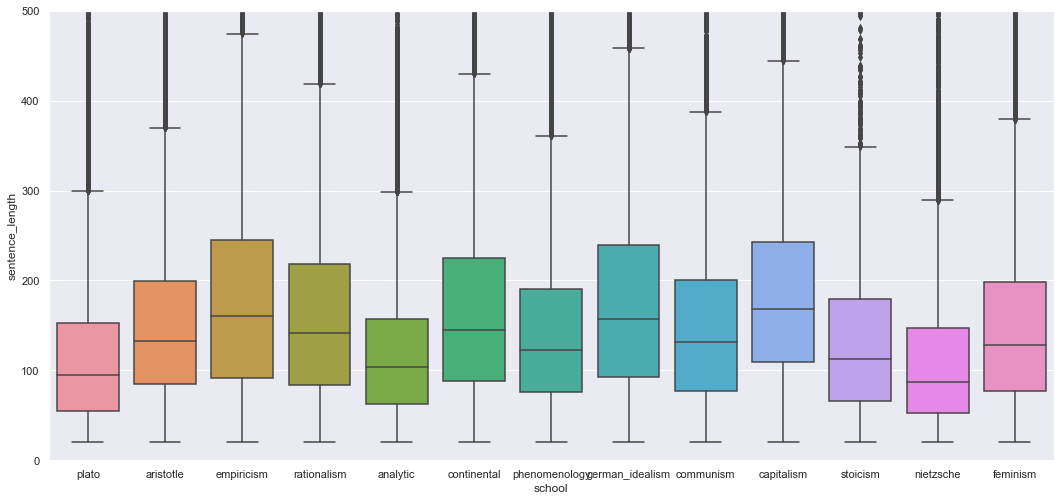

In [34]:
sns.set(rc={'figure.figsize':(18,8.27)})
g = sns.boxplot(x='school', y='sentence_length',  data=df)
g.set(ylim = (0, 500))
plt.savefig("../figs/sentence_len_box.jpeg")

## Topic 2. Choice of words
### Question 2.1 Most frequently used words by each school

In [35]:
from wordcloud import WordCloud, STOPWORDS

In [36]:
comment_words = ""
for i in df[df['school'] == "plato"]["lemmatized_str"]:
    comment_words += i

In [37]:
STOPWORDS.add("PRON")
stopwords = set(STOPWORDS)

In [38]:
def draw_wordcloud(data, school = None):
    comment_words = ""
    for i in data["lemmatized_str"]:
        comment_words += i
    
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)
    plt.figure(figsize = (6, 6), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    if school is not None:
        plt.savefig("../figs/{}_wordcloud.png".format(school))
    plt.show()

aristotle


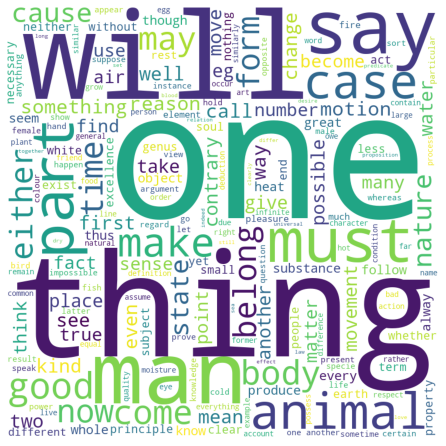

analytic


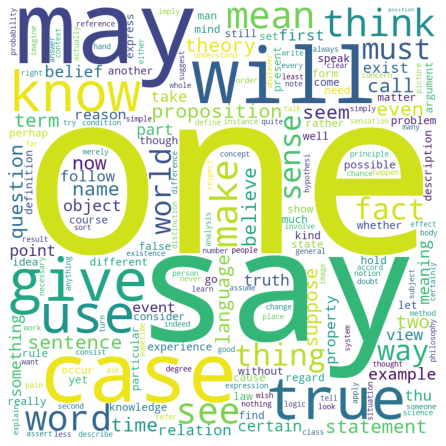

rationalism


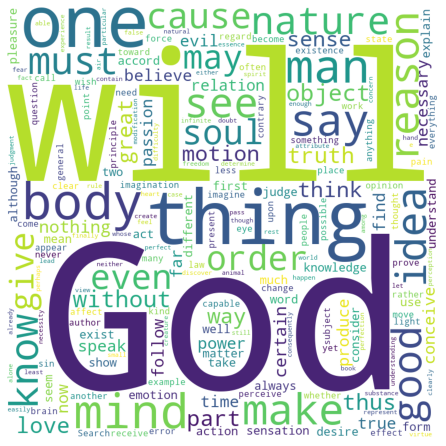

german_idealism


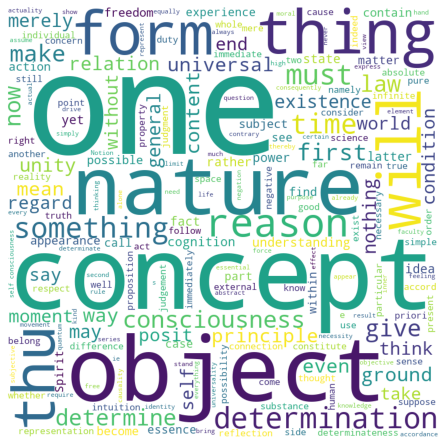

empiricism


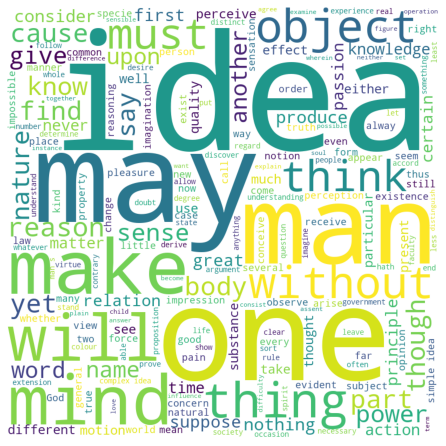

continental


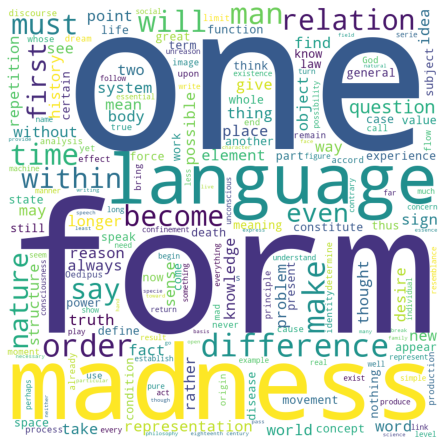

stoicism


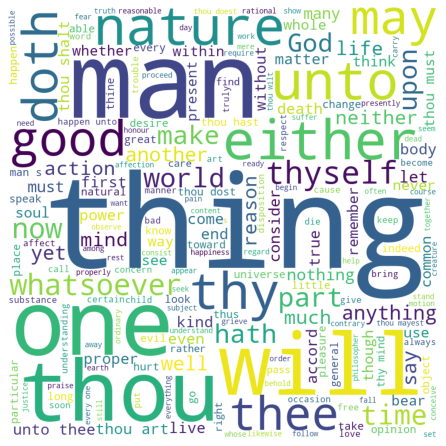

capitalism


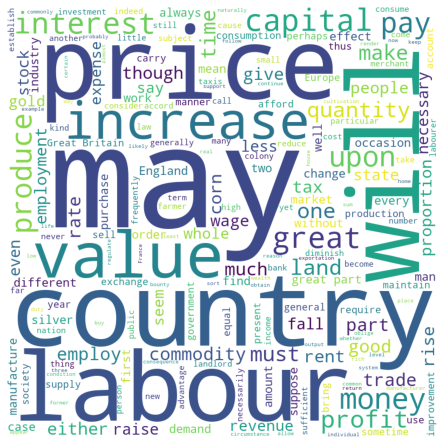

nietzsche


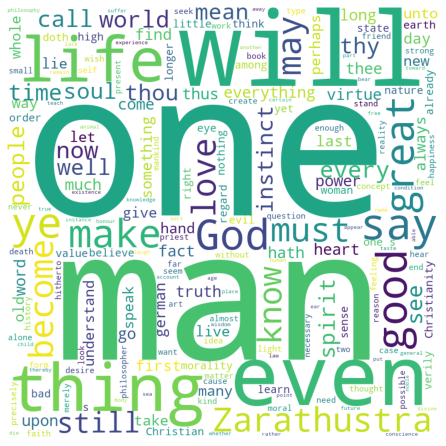

feminism


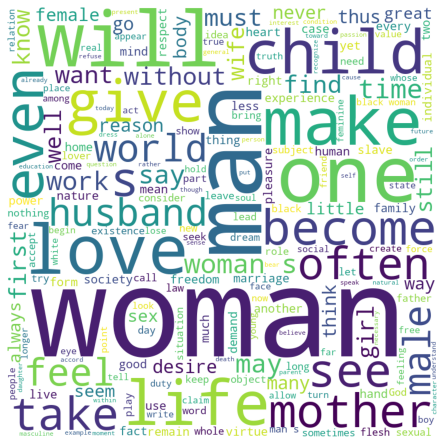

phenomenology


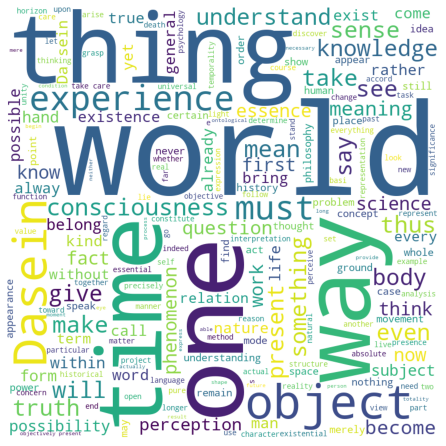

communism


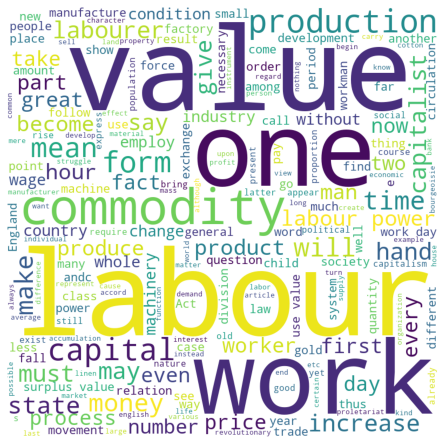

plato


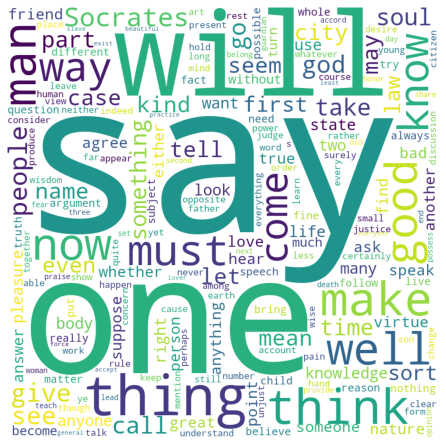

In [20]:
school_list = set(df['school'])
for s in school_list:
    print(s)
    draw_wordcloud(df[df["school"] == s], school = s)

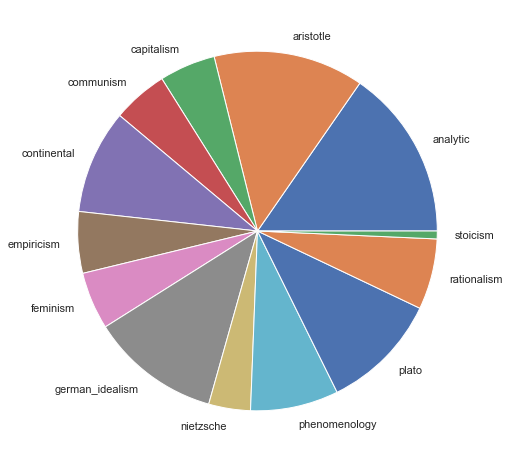

In [27]:
(unique, counts) = np.unique(df['school'], return_counts=True)
plt.pie(counts, labels = unique)
plt.savefig("../figs/school_cnt_pie.jpeg")